Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

- As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

- Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

- Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

- Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

- Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

- Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

- Come up with some initial hypotheses based on your goal of predicting property value.

- Visualize all combinations of variables in some way.

- Run the appropriate statistical tests where needed.

- What independent variables are correlated with the dependent variable, home value?

- Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

- Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

- Explore your dataset with any other visualizations you think will be helpful.

Bonus Exercise

In a seperate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [268]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway

In [2]:
# retrieve prepared dataset using wrangle function and save the zillow database to a variable
df = wrangle.wrangle_zillow()

In [93]:
df['decade'] = df.year.astype(str)
df['decade'] = df['decade'].str.replace('1900', '1900s').str.replace('1901', '1900s').str.replace('1902', '1900s').str.replace('1903', '1900s').str.replace('1904', '1900s').str.replace('1905', '1900s').str.replace('1906', '1900s').str.replace('1907', '1900s').str.replace('1908', '1900s').str.replace('1909', '1900s')
df['decade'] = df['decade'].str.replace('1910', '1910s').str.replace('1911', '1910s').str.replace('1912', '1910s').str.replace('1913', '1910s').str.replace('1914', '1910s').str.replace('1915', '1910s').str.replace('1916', '1910s').str.replace('1917', '1910s').str.replace('1918', '1910s').str.replace('1919', '1910s')
df['decade'] = df['decade'].str.replace('1920', '1920s').str.replace('1921', '1920s').str.replace('1922', '1920s').str.replace('1923', '1920s').str.replace('1924', '1920s').str.replace('1925', '1920s').str.replace('1926', '1920s').str.replace('1927', '1920s').str.replace('1928', '1920s').str.replace('1929', '1920s')
df['decade'] = df['decade'].str.replace('1930', '1930s').str.replace('1931', '1930s').str.replace('1932', '1930s').str.replace('1933', '1930s').str.replace('1934', '1930s').str.replace('1935', '1930s').str.replace('1936', '1930s').str.replace('1937', '1930s').str.replace('1938', '1930s').str.replace('1939', '1930s')
df['decade'] = df['decade'].str.replace('1940', '1940s').str.replace('1941', '1940s').str.replace('1942', '1940s').str.replace('1943', '1940s').str.replace('1944', '1940s').str.replace('1945', '1940s').str.replace('1946', '1940s').str.replace('1947', '1940s').str.replace('1948', '1940s').str.replace('1949', '1940s')
df['decade'] = df['decade'].str.replace('1950', '1950s').str.replace('1951', '1950s').str.replace('1952', '1950s').str.replace('1953', '1950s').str.replace('1954', '1950s').str.replace('1955', '1950s').str.replace('1956', '1950s').str.replace('1957', '1950s').str.replace('1958', '1950s').str.replace('1959', '1950s')
df['decade'] = df['decade'].str.replace('1960', '1960s').str.replace('1961', '1960s').str.replace('1962', '1960s').str.replace('1963', '1960s').str.replace('1964', '1960s').str.replace('1965', '1960s').str.replace('1966', '1960s').str.replace('1967', '1960s').str.replace('1968', '1960s').str.replace('1969', '1960s')
df['decade'] = df['decade'].str.replace('1970', '1970s').str.replace('1971', '1970s').str.replace('1972', '1970s').str.replace('1973', '1970s').str.replace('1974', '1970s').str.replace('1975', '1970s').str.replace('1976', '1970s').str.replace('1977', '1970s').str.replace('1978', '1970s').str.replace('1979', '1970s')
df['decade'] = df['decade'].str.replace('1980', '1980s').str.replace('1981', '1980s').str.replace('1982', '1980s').str.replace('1983', '1980s').str.replace('1984', '1980s').str.replace('1985', '1980s').str.replace('1986', '1980s').str.replace('1987', '1980s').str.replace('1988', '1980s').str.replace('1989', '1980s')
df['decade'] = df['decade'].str.replace('1990', '1990s').str.replace('1991', '1990s').str.replace('1992', '1990s').str.replace('1993', '1990s').str.replace('1994', '1990s').str.replace('1995', '1990s').str.replace('1996', '1990s').str.replace('1997', '1990s').str.replace('1998', '1990s').str.replace('1999', '1990s')
df['decade'] = df['decade'].str.replace('2000', '2000s').str.replace('2001', '2000s').str.replace('2002', '2000s').str.replace('2003', '2000s').str.replace('2004', '2000s').str.replace('2005', '2000s').str.replace('2006', '2000s').str.replace('2007', '2000s').str.replace('2008', '2000s').str.replace('2009', '2000s')
df['decade'] = df['decade'].str.replace('2010', '2010s').str.replace('2011', '2010s').str.replace('2012', '2010s').str.replace('2013', '2010s').str.replace('2014', '2010s').str.replace('2015', '2010s').str.replace('2016', '2010s')
df = df.rename(columns={'decade':'decades'})

Dataset information and univariate analysis

In [3]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
18,3,1.0,1244.0,169471.0,1950,2532.88,6037
19,3,2.0,1300.0,233266.0,1950,3110.99,6037
20,3,2.0,1222.0,290492.0,1951,3870.25,6037
23,3,2.5,1821.0,537949.0,2013,6173.72,6059


In [4]:
df.describe()

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
count,1.665488e+06,1.665488e+06,1.665488e+06,1.665488e+06,1.665488e+06,1.665488e+06,1.665488e+06
mean,3.202682e+00,2.018917e+00,1.618805e+03,2.802478e+05,1.958524e+03,3.543433e+03,6.047874e+03
std,8.305850e-01,7.184164e-01,5.723218e+02,1.494784e+05,1.996527e+01,1.718057e+03,2.039691e+01
min,1.000000e+00,5.000000e-01,7.010000e+02,1.312000e+03,1.900000e+03,1.648000e+01,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.210000e+03,1.589940e+05,1.949000e+03,2.191490e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.502000e+03,2.697620e+05,1.956000e+03,3.448020e+03,6.037000e+03
75%,4.000000e+00,2.500000e+00,1.909000e+03,3.939160e+05,1.970000e+03,4.838763e+03,6.059000e+03
max,7.000000e+00,5.500000e+00,9.880000e+03,5.999990e+05,2.016000e+03,7.999920e+03,6.111000e+03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665488 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1665488 non-null  int64  
 1   bathrooms   1665488 non-null  float64
 2   sqft        1665488 non-null  float64
 3   tax_value   1665488 non-null  float64
 4   year        1665488 non-null  int64  
 5   tax_amount  1665488 non-null  float64
 6   fips        1665488 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 101.7 MB


In [6]:
df.bedrooms.value_counts()

3    819305
4    458274
2    288849
5     75617
1     11026
6     10711
7      1706
Name: bedrooms, dtype: int64

In [7]:
df.bathrooms.value_counts()

2.00    840223
1.00    370020
3.00    282499
2.50    101205
1.50     30131
4.00     28287
3.50      7934
5.00      3967
4.50      1125
5.50        89
0.50         6
1.75         2
Name: bathrooms, dtype: int64

In [8]:
df.tax_amount.describe()

count    1.665488e+06
mean     3.543433e+03
std      1.718057e+03
min      1.648000e+01
25%      2.191490e+03
50%      3.448020e+03
75%      4.838763e+03
max      7.999920e+03
Name: tax_amount, dtype: float64

<AxesSubplot:>

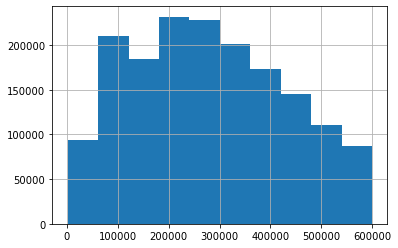

In [9]:
df.tax_value.hist()

<AxesSubplot:>

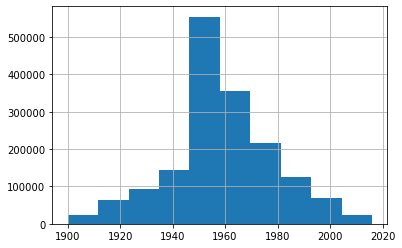

In [10]:
df.year.hist()

<AxesSubplot:>

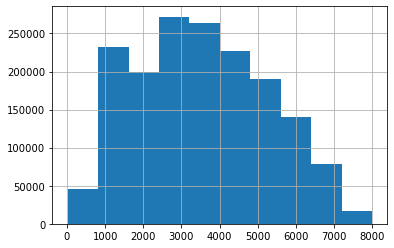

In [11]:
df.tax_amount.hist()

<AxesSubplot:>

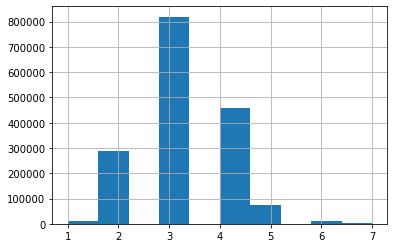

In [12]:
df.bedrooms.hist()

<AxesSubplot:>

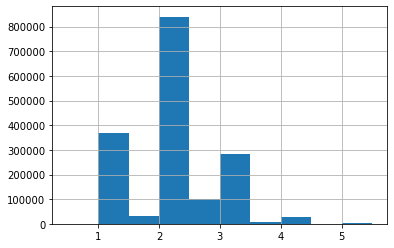

In [13]:
df.bathrooms.hist()

In [14]:
df.fips.value_counts()

6037    1144099
6059     393686
6111     127703
Name: fips, dtype: int64

Bivariate analysis
- Data must be split first

In [125]:
# split the data using the split_data function in my wrangle.py file
train, validate, test = wrangle.split_data(df)

In [126]:
# make sure the three datasets have been split 60/20/20
train.shape, validate.shape, test.shape

((999292, 8), (333098, 8), (333098, 8))

<Figure size 1440x432 with 0 Axes>

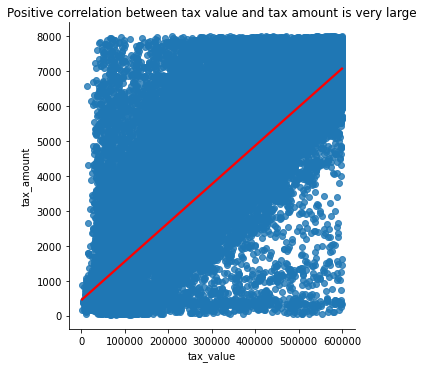

In [127]:
# relationship between tax_value and tax_amount with regression line
plt.figure(figsize=[20,6])
sns.lmplot(x='tax_value', y='tax_amount', data=train, line_kws={'color': 'red'})
plt.title('Positive correlation between tax value and tax amount is very large')
plt.show()

<Figure size 1440x648 with 0 Axes>

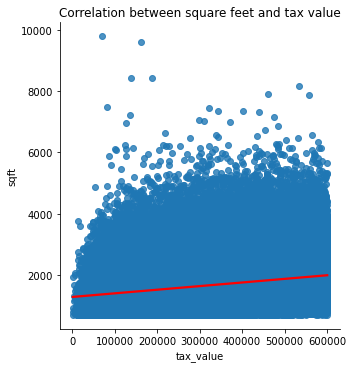

In [128]:
# relationship between tax_value and sqft with regression line
plt.figure(figsize=[20,9])
sns.lmplot(x='tax_value', y='sqft', data=train, line_kws={'color': 'red'})
plt.title('Correlation between square feet and tax value')
plt.show()

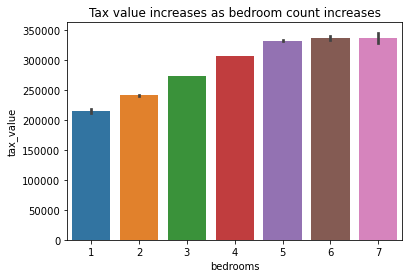

In [129]:
# visualization of relationship between number of bedrooms and tax value
sns.barplot(x='bedrooms', y='tax_value', data=train)
plt.title('Tax value increases as bedroom count increases')
plt.show()

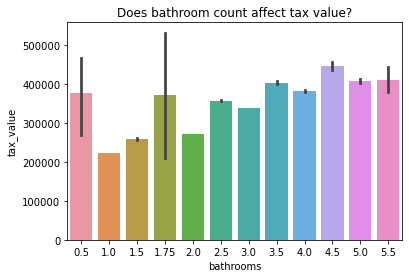

In [130]:
# visualization of relationship between number of bathrooms and tax value
sns.barplot(x='bathrooms', y='tax_value', data=train)
plt.title('Does bathroom count affect tax value?')
plt.show()

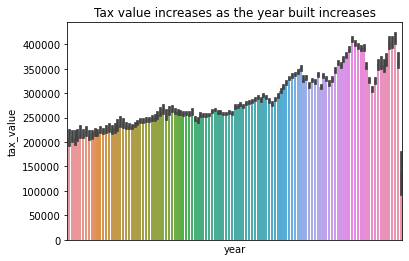

In [131]:
# relationship between year built and tax value
sns.barplot(x='year', y='tax_value', data=train)
plt.title('Tax value increases as the year built increases')
plt.xticks([])
plt.show()
# the dip in tax value looks like it is related to the housing market crash of 2008

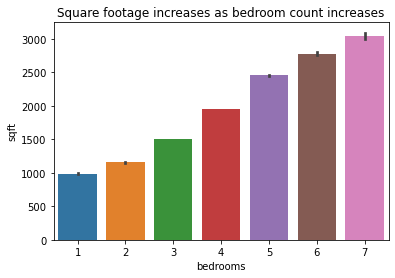

In [132]:
# relationship bedrooms and sqft
sns.barplot(x='bedrooms', y='sqft', data=train)
plt.title('Square footage increases as bedroom count increases')
plt.show()

In [133]:
# pearson correlations between variables
zillow_corr = train.corr()
zillow_corr

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
bedrooms,1.000000,0.592757,0.601829,0.170471,0.342043,0.174993,0.142705
bathrooms,0.592757,1.000000,0.758086,0.286281,0.504358,0.289559,0.121864
sqft,0.601829,0.758086,1.000000,0.308269,0.413196,0.310376,0.114233
tax_value,0.170471,0.286281,0.308269,1.000000,0.216321,0.960914,0.115472
year,0.342043,0.504358,0.413196,0.216321,1.000000,0.227408,0.277652
tax_amount,0.174993,0.289559,0.310376,0.960914,0.227408,1.000000,0.028655
fips,0.142705,0.121864,0.114233,0.115472,0.277652,0.028655,1.000000


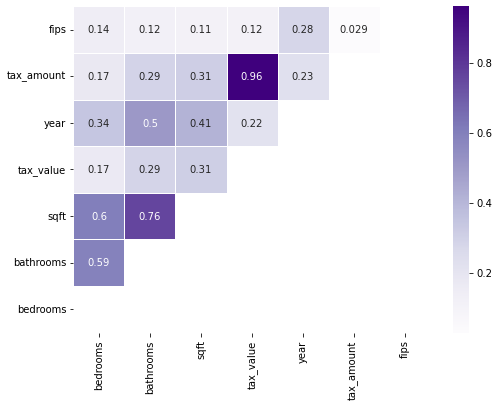

In [134]:
# pearson's correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(zillow_corr))
plt.ylim(0, 7)

plt.show()

In [135]:
# spearman correlation
zillow_spearman = train.corr(method='spearman')
zillow_spearman

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
bedrooms,1.000000,0.587133,0.615949,0.170822,0.400718,0.173290,0.171674
bathrooms,0.587133,1.000000,0.768842,0.288388,0.556448,0.286763,0.183483
sqft,0.615949,0.768842,1.000000,0.301771,0.465585,0.297987,0.168678
tax_value,0.170822,0.288388,0.301771,1.000000,0.207907,0.965603,0.142970
year,0.400718,0.556448,0.465585,0.207907,1.000000,0.203987,0.387339
tax_amount,0.173290,0.286763,0.297987,0.965603,0.203987,1.000000,0.049817
fips,0.171674,0.183483,0.168678,0.142970,0.387339,0.049817,1.000000


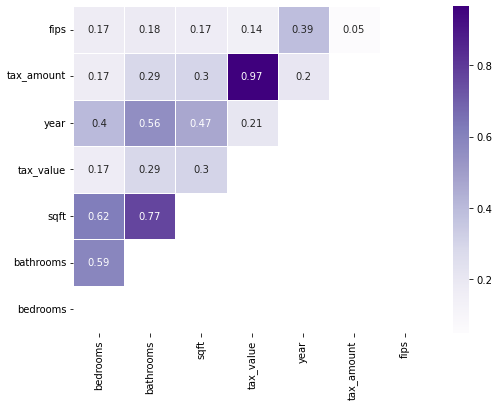

In [136]:
# heatmap of spearman correlation
plt.figure(figsize=(8,6))
sns.heatmap(zillow_spearman, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(zillow_corr))
plt.ylim(0, 7)

plt.show()

In [137]:
cross = pd.crosstab(train.bedrooms, train.bathrooms)
corr1 = cross.corr()
corr1

bathrooms,0.50,1.00,1.50,1.75,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50
bathrooms,,,,,,,,,,,,
0.50,1.000000,0.969980,0.558059,0.930261,0.338887,0.101274,-0.107660,-0.266105,-0.368947,-0.400434,-0.497369,-0.551666
1.00,0.969980,1.000000,0.738587,0.989931,0.539601,0.266221,0.005704,-0.204983,-0.329582,-0.390542,-0.513915,-0.567964
1.50,0.558059,0.738587,1.000000,0.813461,0.951132,0.718449,0.429565,0.154387,0.010411,-0.133133,-0.284311,-0.334768
1.75,0.930261,0.989931,0.813461,1.000000,0.621785,0.321513,0.036497,-0.189088,-0.311972,-0.375775,-0.500968,-0.532423
2.00,0.338887,0.539601,0.951132,0.621785,1.000000,0.888430,0.665426,0.403973,0.253366,0.062832,-0.091492,-0.191408
2.50,0.101274,0.266221,0.718449,0.321513,0.888430,1.000000,0.927736,0.733982,0.584564,0.346750,0.201110,0.003910
3.00,-0.107660,0.005704,0.429565,0.036497,0.665426,0.927736,1.000000,0.925380,0.820036,0.613571,0.491003,0.257984
3.50,-0.266105,-0.204983,0.154387,-0.189088,0.403973,0.733982,0.925380,1.000000,0.972369,0.858796,0.769873,0.558257
4.00,-0.368947,-0.329582,0.010411,-0.311972,0.253366,0.584564,0.820036,0.972369,1.000000,0.945778,0.897269,0.730660


<AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>

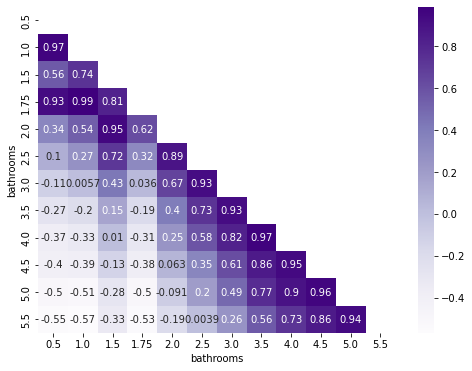

In [138]:
plt.figure(figsize=[8,6])
sns.heatmap(corr1, cmap='Purples', annot=True, mask=np.triu(corr1))

In [139]:
cross2 = pd.crosstab(train.fips, train.decades)
corr2 = cross2.corr()
corr2

decades,1900s,1910s,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s
decades,,,,,,,,,,,,
1900s,1.000000,0.999790,0.999999,0.999977,0.999986,0.983597,0.743398,0.261519,0.960313,0.763868,0.999485,0.971746
1910s,0.999790,1.000000,0.999820,0.999626,0.999670,0.987086,0.756947,0.281241,0.965827,0.776931,0.998617,0.976378
1920s,0.999999,0.999820,1.000000,0.999965,0.999977,0.983874,0.744430,0.263009,0.960742,0.764863,0.999434,0.972109
1930s,0.999977,0.999626,0.999965,1.000000,0.999999,0.982337,0.738797,0.254898,0.958379,0.759427,0.999681,0.970106
1940s,0.999986,0.999670,0.999977,0.999999,1.000000,0.982644,0.739906,0.256491,0.958848,0.760498,0.999638,0.970504
1950s,0.983597,0.987086,0.983874,0.982337,0.982644,1.000000,0.851852,0.431333,0.994874,0.867751,0.977300,0.998381
1960s,0.743398,0.756947,0.744430,0.738797,0.739906,0.851852,1.000000,0.839985,0.900453,0.999515,0.721548,0.880262
1970s,0.261519,0.281241,0.263009,0.254898,0.256491,0.431333,0.839985,1.000000,0.520358,0.822679,0.230405,0.481945
1980s,0.960313,0.965827,0.960742,0.958379,0.958848,0.994874,0.900453,0.520358,1.000000,0.913563,0.950866,0.999015


In [196]:
def plot_variable_hist(train):
    
    plt.figure(figsize=(24, 20))

    # List of columns
    cols = ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amount', 'year', 'decades']
    for i, col in enumerate(cols):
        # i starts at 0, but plot nos should start at 1
        subplot_num = i+1
        # Create subplot.
        plt.subplot(5,2,subplot_num)
        # Title with column name.
        plt.title(col)
        # Display histogram for column.
        train[col].hist()
        # Hide gridlines.
        plt.grid(False)

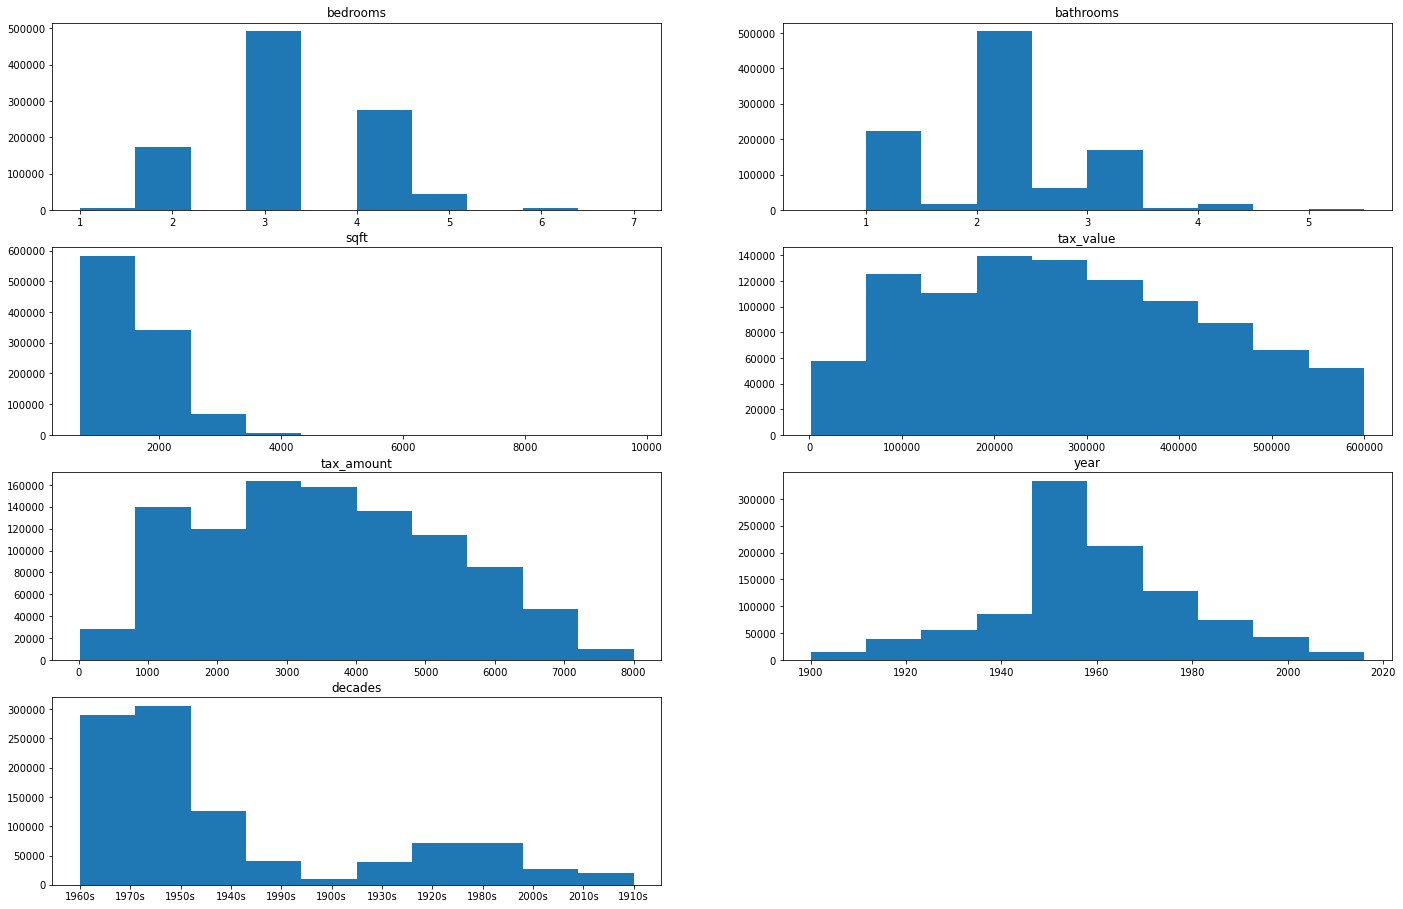

In [197]:
plot_variable_hist(train)

<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

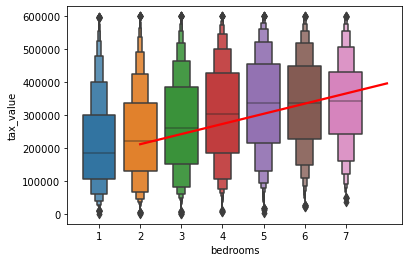

In [222]:
fig, ax = plt.subplots()
sns.boxenplot(x='bedrooms', y='tax_value', data=train)
sns.regplot(x='bedrooms', y='tax_value', data=train, scatter=False, color='red')

In [247]:
def plot_variable_pairs(train):
    return sns.pairplot(train.sample(1000), kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})

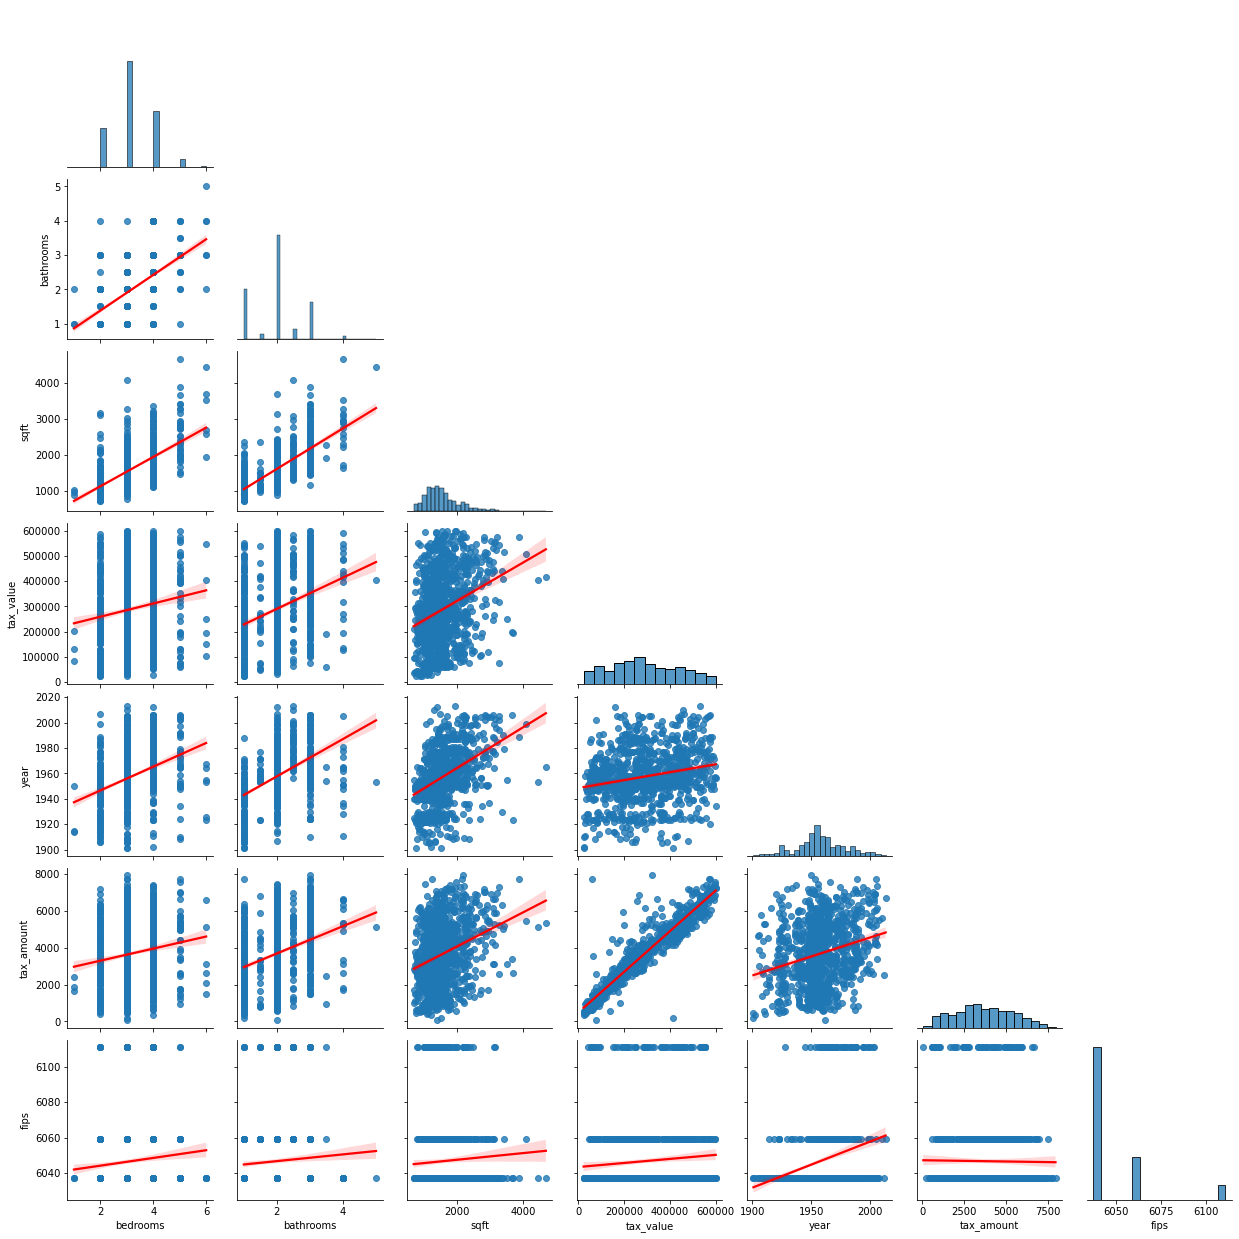

In [248]:
plot_variable_pairs(train)

In [253]:
def plot_categorical_and_continuous_vars(train):
    
    cat = ['bedrooms','bathrooms','year']
    cont = ['sqft','tax_amount','tax_value']
    plt.figure(figsize=[20,16])   
    plt.subplot(3,3,1)
    sns.boxenplot(x='bedrooms', y='tax_value', data=train, showfliers=False)
    sns.regplot(x='bedrooms', y='tax_value', data=train, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,2)
    sns.boxenplot(x='bathrooms', y='tax_value', data=train, showfliers=False)
    sns.regplot(x='bathrooms', y='tax_value', data=train, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,3)
    sns.lineplot(x='year', y='tax_value', data=train)
    sns.regplot(x='year', y='tax_value', data=train, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,4)
    sns.boxenplot(x='bedrooms', y='tax_amount', data=train, showfliers=False)
    sns.regplot(x='bedrooms', y='tax_amount', data=train, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,5)
    sns.boxenplot(x='bathrooms', y='tax_amount', data=train, showfliers=False)
    sns.regplot(x='bathrooms', y='tax_amount', data=train, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,6)
    sns.lineplot(x='year', y='tax_amount', data=train)
    sns.regplot(x='year', y='tax_amount', data=train, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,7)
    sns.boxenplot(x='bedrooms', y='sqft', data=train, showfliers=False)
    sns.regplot(x='bedrooms', y='sqft', data=train, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,8)
    sns.boxenplot(x='bathrooms', y='sqft', data=train, showfliers=False)
    sns.regplot(x='bathrooms', y='sqft', data=train, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,9)
    sns.lineplot(x='year', y='sqft', data=train)
    sns.regplot(x='year', y='sqft', data=train, truncate=False, scatter=False, color='red')

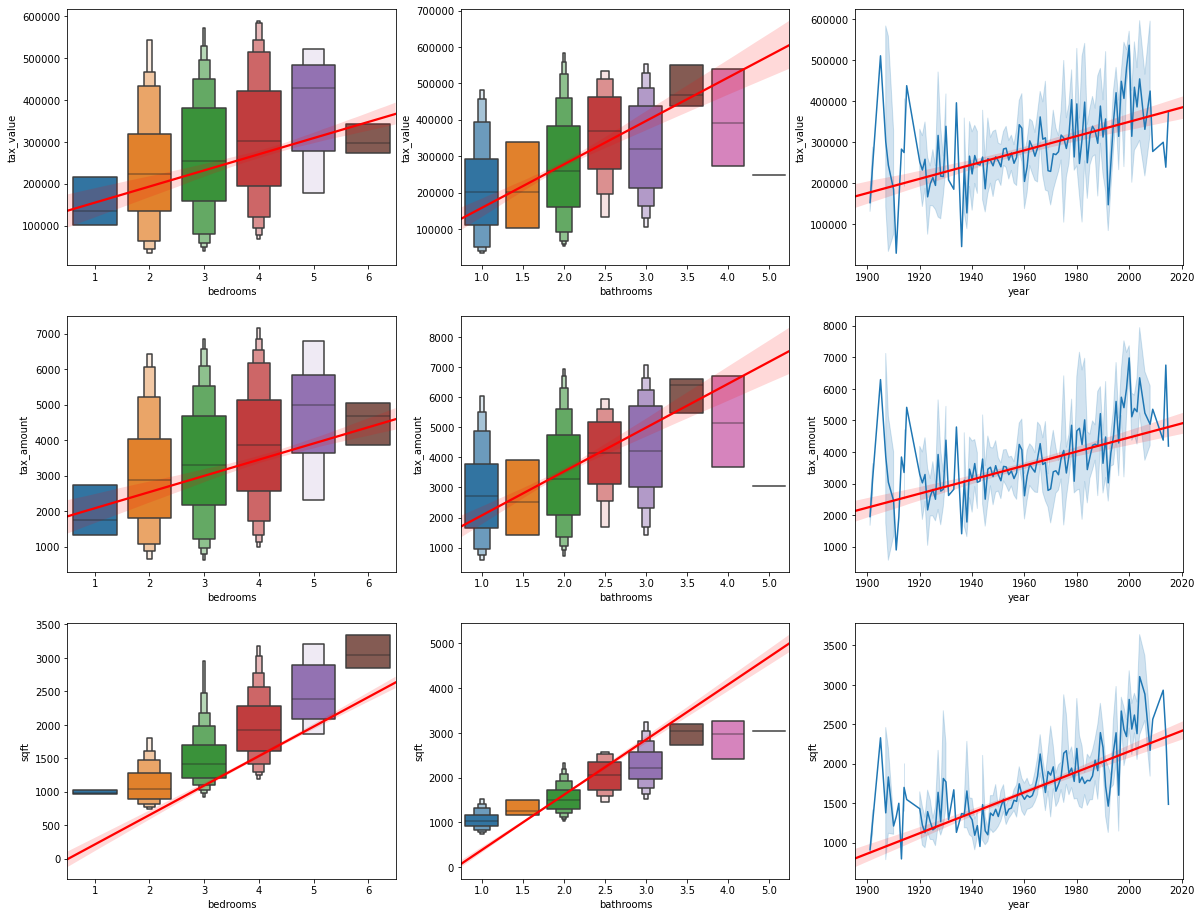

In [254]:
plot_categorical_and_continuous_vars(train.sample(1000))

### Initial Hypotheses

- The higher the tax amount, the higher the tax value will be.
- Homes with more square feet will have a higher tax value.
- Homes with more bedrooms and more bathrooms will have a higher tax value.
- Recent homes will have a higher tax value than older homes.


#### Relationship between tax amount and tax value

H0: There is no linear correlation between tax amount and tax value.

Ha: There is a linear correlation between tax amount and tax value.

In [263]:
corr, p = spearmanr(train.tax_amount, train.tax_value)
corr, p

(0.9656033117423636, 0.0)

In [264]:
alpha = .05

if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation between tax amount and tax value.')
else:
    print('We fail to reject the null hypothesis that there is no linear correlation between tax amount and tax value.')

We reject the null hypothesis that there is no linear correlation between tax amount and tax value.


#### Relationship between square feet and tax value

H0: There is no linear correlation between square feet and tax value.

Ha: There is a linear correlation between square feet and tax value.

In [261]:
corr, p = spearmanr(train.sqft, train.tax_value)
corr, p

(0.3017705188635019, 0.0)

In [262]:
alpha = .05

if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation between square feet and tax value.')
else:
    print('We fail to reject the null hypothesis that there is no linear correlation between square feet and tax value.')

We reject the null hypothesis that there is no linear correlation between square feet and tax value.


#### Relationship between tax amount and square feet

H0: There is no linear correlation between square feet and tax amount.

Ha: There is a linear correlation between square feet and tax amount.

In [265]:
corr, p = spearmanr(train.sqft, train.tax_amount)
corr, p

(0.29798724760888956, 0.0)

In [266]:
alpha = .05

if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation between square feet and tax amount.')
else:
    print('We fail to reject the null hypothesis that there is no linear correlation between square feet and tax amount.')

We reject the null hypothesis that there is no linear correlation between square feet and tax amount.


#### Relationship between tax value and bedrooms

H0: There is no difference between the average tax value and number of bedrooms.

Ha: There is a significant difference between the average tax value and number of bedrooms.

In [273]:
t, p = ttest_ind(train.tax_value, train.bedrooms, equal_var=False)
t, p

(1873.8751018427881, 0.0)

In [274]:
alpha = .05

if p < alpha:
    print('We reject the null hypothesis that there is no difference between the average tax value and number of bedrooms.')
else:
    print('We fail to reject the null hypothesis that there is no difference between the average tax value and number of bedrooms.')

We reject the null hypothesis that there is no difference between the average tax value and number of bedrooms.


#### Relationship between tax value and bathrooms

H0: There is no difference between the average tax value and number of bathrooms.

Ha: There is a significant difference between the average tax value and number of bathrooms.

In [275]:
t, p = ttest_ind(train.tax_value, train.bathrooms, equal_var=False)
t, p

(1873.883019177621, 0.0)

In [276]:
alpha = .05

if p < alpha:
    print('We reject the null hypothesis that there is no difference between the average tax value and number of bathrooms.')
else:
    print('We fail to reject the null hypothesis that there is no difference between the average tax value and number of bathrooms.')

We reject the null hypothesis that there is no difference between the average tax value and number of bathrooms.


#### Relationship between tax value and year

H0: There is no difference between the average tax value and the year built.

Ha: There is a significant difference between the average tax value and year built.

In [277]:
t, p = ttest_ind(train.tax_value, train.year, equal_var=False)
t, p

(1860.7978539094186, 0.0)

In [278]:
alpha = .05

if p < alpha:
    print('We reject the null hypothesis that there is no difference between the average tax value and the year built.')
else:
    print('We fail to reject the null hypothesis that there is no difference between the average tax value and the year built.')

We reject the null hypothesis that there is no difference between the average tax value and the year built.
